In [1]:
import pandas as pd

# 读取CSV文件
file_path = r'C:\Users\mjy\Desktop\Project_MSCM\上证银行股指数历史数据.csv'
data = pd.read_csv(file_path, usecols=['日期', '收盘'])

# 将日期列转换为datetime类型
data['日期'] = pd.to_datetime(data['日期'])

# 设置日期为索引
data.set_index('日期', inplace=True)

# 生成完整的日期范围
full_date_range = pd.date_range(start='2021-03-04', end='2023-12-31', freq='D')

# 重新索引数据以包含完整的日期范围
data = data.reindex(full_date_range)

# 使用线性插值填充缺失的收盘价
data['收盘'] = data['收盘'].interpolate(method='linear')

# 重置索引并重命名列
data.reset_index(inplace=True)
data.columns = ['日期', '收盘']

# 保存结果到CSV文件
output_path = r'C:\Users\mjy\Desktop\Project_MSCM\final_history.csv'
data.to_csv(output_path, index=False)

print(f"Final history data has been saved to {output_path}")

Final history data has been saved to C:\Users\mjy\Desktop\Project_MSCM\final_history.csv


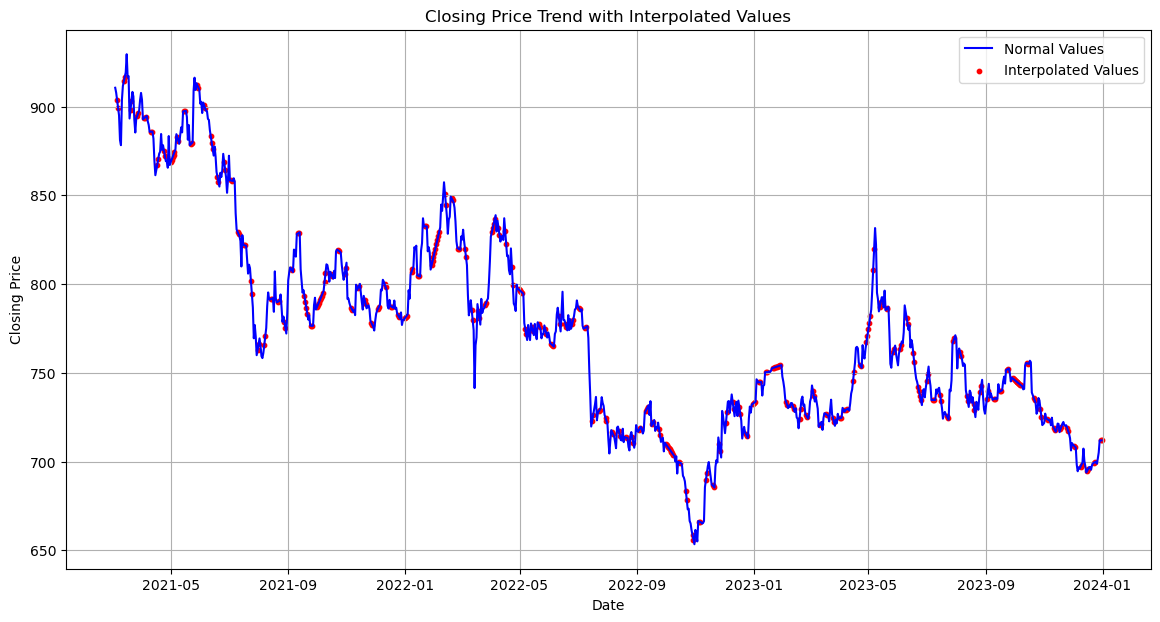

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = r'C:\Users\mjy\Desktop\Project_MSCM\final_history.csv'
data = pd.read_csv(file_path)

# 将日期列转换为datetime类型
data['日期'] = pd.to_datetime(data['日期'])

# 找到插值填充的值
# 我们假设插值值为那些在原始数据中不存在的日期
original_file_path = r'C:\Users\mjy\Desktop\Project_MSCM\上证银行股指数历史数据.csv'
original_data = pd.read_csv(original_file_path, usecols=['日期', '收盘'])
original_data['日期'] = pd.to_datetime(original_data['日期'])

# 标记插值填充的日期
data['is_interpolated'] = ~data['日期'].isin(original_data['日期'])

# 绘制图形
plt.figure(figsize=(14, 7))

# 绘制正常值
plt.plot(data['日期'], data['收盘'], label='Normal Values', color='blue')

# 绘制插值值
interpolated_data = data[data['is_interpolated']]
plt.scatter(interpolated_data['日期'], interpolated_data['收盘'], color='red', label='Interpolated Values', s=10)

# 添加标题和标签
plt.title('Closing Price Trend with Interpolated Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# 显示图形
plt.grid(True)
plt.show()

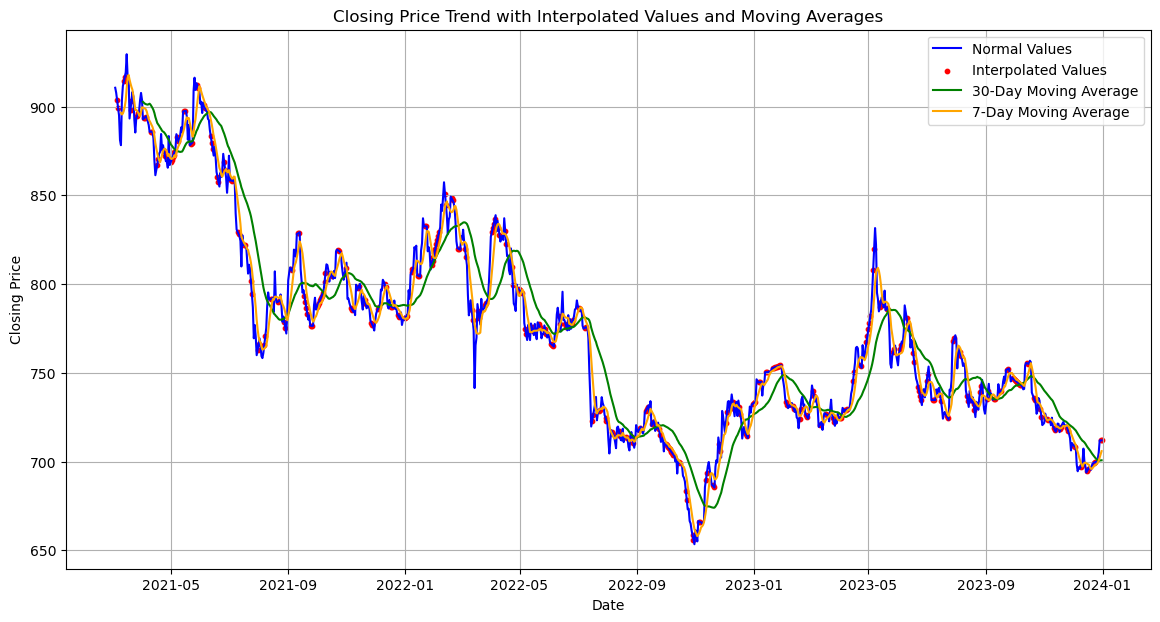

In [7]:
# 计算30日移动平均线
data['30_day_MA'] = data['收盘'].rolling(window=30).mean()

# 计算7日移动平均线
data['7_day_MA'] = data['收盘'].rolling(window=7).mean()

# 绘制图形
plt.figure(figsize=(14, 7))

# 绘制正常值
plt.plot(data['日期'], data['收盘'], label='Normal Values', color='blue')

# 绘制插值值
plt.scatter(interpolated_data['日期'], interpolated_data['收盘'], color='red', label='Interpolated Values', s=10)

# 绘制30日移动平均线
plt.plot(data['日期'], data['30_day_MA'], label='30-Day Moving Average', color='green')

# 绘制7日移动平均线
plt.plot(data['日期'], data['7_day_MA'], label='7-Day Moving Average', color='orange')

# 添加标题和标签
plt.title('Closing Price Trend with Interpolated Values and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# 显示图形
plt.grid(True)
plt.show()